# Classifying Fashion-MNIST

Now it's your turn to build and train a neural network. You'll be using the [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist), a drop-in replacement for the MNIST dataset. MNIST is actually quite trivial with neural networks where you can easily achieve better than 97% accuracy. Fashion-MNIST is a set of 28x28 greyscale images of clothes. It's more complex than MNIST, so it's a better representation of the actual performance of your network, and a better representation of datasets you'll use in the real world.

<img src='assets/fashion-mnist-sprite.png' width=500px>

In this notebook, you'll build your own neural network. For the most part, you could just copy and paste the code from Part 3, but you wouldn't be learning. It's important for you to write the code yourself and get it to work. Feel free to consult the previous notebook though as you work through this.

First off, let's load the dataset through torchvision.

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import numpy as np
import time

import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms

import helper

In [3]:

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
# Download and load the training data
trainset = datasets.FashionMNIST('F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

Here we can see one of the images.

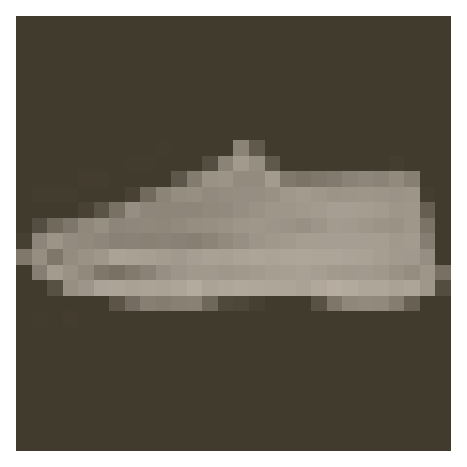

In [9]:
image, label = next(iter(trainloader))
helper.imshow(image[0,:]);

With the data loaded, it's time to import the necessary packages.

## Building the network

Here you should define your network. As with MNIST, each image is 28x28 which is a total of 784 pixels, and there are 10 classes. You should include at least one hidden layer. We suggest you use ReLU activations for the layers and to return the logits from the forward pass. It's up to you how many layers you add and the size of those layers.

In [10]:
# TODO: Define your network architecture here
class Network(nn.Module):
    def __init__(self, input_size, output_size, hidden_layers, drop_p=0.5):
        ''' Builds a feedforward network with arbitrary hidden layers.
        
            Arguments
            ---------
            input_size: integer, size of the input
            output_size: integer, size of the output layer
            hidden_layers: list of integers, the sizes of the hidden layers
            drop_p: float between 0 and 1, dropout probability
        '''
        super().__init__()
        
        # Add the first layer, input to a hidden layer
        self.hidden_layers = nn.ModuleList([nn.Linear(input_size,hidden_layers[0])])
        layer_sizes=zip(hidden_layers[:-1], hidden_layers[1:])
        # Add a variable number of more hidden layers
        self.hidden_layers.extend([nn.Linear(h1,h2) for h1,h2 in layer_sizes] )
        self.output = nn.Linear(hidden_layers[-1],output_size)
        self.dropout = nn.Dropout(p = drop_p)
        

        
    def forward(self,x):
        ''' Forward pass through the network, returns the output logits '''
        
        # Forward through each layer in `hidden_layers`, with ReLU activation and dropout
        for linear in self.hidden_layers:
            x = F.relu(linear(x))
            x = self.dropout(x)
        x = self.output(x)
        return F.log_softmax(x, dim =1)



# Train the network

Now you should create your network and train it. First you'll want to define [the criterion](http://pytorch.org/docs/master/nn.html#loss-functions) ( something like `nn.CrossEntropyLoss`) and [the optimizer](http://pytorch.org/docs/master/optim.html) (typically `optim.SGD` or `optim.Adam`).

Then write the training code. Remember the training pass is a fairly straightforward process:

* Make a forward pass through the network to get the logits 
* Use the logits to calculate the loss
* Perform a backward pass through the network with `loss.backward()` to calculate the gradients
* Take a step with the optimizer to update the weights

By adjusting the hyperparameters (hidden units, learning rate, etc), you should be able to get the training loss below 0.4.

In [12]:
model = Network(784, 10, [516, 256],  drop_p=0.5)

In [47]:
model

Network(
  (hidden_layers): ModuleList(
    (0): Linear(in_features=784, out_features=516, bias=True)
    (1): Linear(in_features=516, out_features=256, bias=True)
  )
  (output): Linear(in_features=256, out_features=10, bias=True)
  (dropout): Dropout(p=0.5)
)

In [25]:
# TODO: Create the network, define the criterion and optimizer
criterion = nn.NLLLoss()

optimizer = optim.Adam(model.parameters(), lr = 0.001)

In [27]:
test_loss = 0
images, labels =  next(iter(testloader))
images.resize_(images.shape[0],784)
output = model.forward(images)
test_loss += criterion(output,labels).item()
ps = torch.exp(output)

In [15]:
ps.size()

torch.Size([64, 10])

In [56]:
ps

tensor([[0.1109, 0.1160, 0.0861, 0.1115, 0.1054, 0.0866, 0.0916, 0.0858, 0.0932,
         0.1129],
        [0.1178, 0.1004, 0.0847, 0.1152, 0.0894, 0.1138, 0.0995, 0.0910, 0.0909,
         0.0974],
        [0.1085, 0.0948, 0.0891, 0.1157, 0.0998, 0.0812, 0.1042, 0.0771, 0.1241,
         0.1055],
        [0.0947, 0.0670, 0.1004, 0.1102, 0.0953, 0.0729, 0.0907, 0.1410, 0.1140,
         0.1139],
        [0.1100, 0.0997, 0.1056, 0.0920, 0.0980, 0.0885, 0.1132, 0.1237, 0.0877,
         0.0816],
        [0.0814, 0.1143, 0.0876, 0.0939, 0.0751, 0.1021, 0.1096, 0.1047, 0.1053,
         0.1261],
        [0.1029, 0.1094, 0.1098, 0.1075, 0.1103, 0.0954, 0.0900, 0.0938, 0.0774,
         0.1034],
        [0.1120, 0.1038, 0.1012, 0.1112, 0.1116, 0.1023, 0.1002, 0.0655, 0.0942,
         0.0980],
        [0.1255, 0.0928, 0.1085, 0.0960, 0.0970, 0.0945, 0.0939, 0.0792, 0.1301,
         0.0824],
        [0.0962, 0.0947, 0.1153, 0.0932, 0.0935, 0.0955, 0.0737, 0.1099, 0.1135,
         0.1144],
        [0

In [73]:
ps.max(dim =1)

(tensor([0.1189, 0.1330, 0.1254, 0.1307, 0.1118, 0.1283, 0.1301, 0.1455, 0.1388,
         0.1186, 0.1258, 0.1266, 0.1672, 0.1235, 0.1209, 0.1425, 0.1212, 0.1272,
         0.1174, 0.1258, 0.1250, 0.1389, 0.1788, 0.1157, 0.1473, 0.1181, 0.1541,
         0.1258, 0.1155, 0.1345, 0.1182, 0.1152, 0.1200, 0.1255, 0.1298, 0.1272,
         0.1269, 0.1324, 0.1218, 0.1232, 0.1267, 0.1171, 0.1177, 0.1184, 0.1247,
         0.1207, 0.1379, 0.1266, 0.1297, 0.1297, 0.1266, 0.1199, 0.1317, 0.1119,
         0.1142, 0.1394, 0.1250, 0.1226, 0.1410, 0.1249, 0.1179, 0.1170, 0.1192,
         0.1224], grad_fn=<MaxBackward0>),
 tensor([4, 6, 6, 0, 6, 0, 2, 6, 2, 6, 8, 0, 6, 2, 6, 2, 4, 9, 6, 2, 2, 6, 6, 6,
         6, 4, 6, 9, 5, 6, 0, 0, 6, 6, 2, 6, 0, 0, 0, 4, 2, 5, 9, 4, 2, 9, 6, 6,
         6, 6, 8, 2, 6, 5, 6, 0, 6, 2, 6, 6, 9, 1, 6, 0]))

In [74]:
ps.max(dim =1)[1]

tensor([4, 6, 6, 0, 6, 0, 2, 6, 2, 6, 8, 0, 6, 2, 6, 2, 4, 9, 6, 2, 2, 6, 6, 6,
        6, 4, 6, 9, 5, 6, 0, 0, 6, 6, 2, 6, 0, 0, 0, 4, 2, 5, 9, 4, 2, 9, 6, 6,
        6, 6, 8, 2, 6, 5, 6, 0, 6, 2, 6, 6, 9, 1, 6, 0])

In [28]:
equality = (labels.data == ps.max(dim =1)[1])

In [17]:
equality

tensor([1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=torch.uint8)

In [29]:
accuracy = equality.type(torch.FloatTensor).mean()

In [30]:
accuracy

tensor(0.0781)

# ALL TOGETHER FOR VALIDATION

In [31]:
def validation(model,testloader,cretiron):
    test_loss = 0
    accuracy =0
    for images, labels in testloader:
        images.resize_(images.shape[0],784)
        output = model.forward(images)
        test_loss += cretiron(output,labels).item()
        ps = torch.exp(output)
        equality = (labels.data == ps.max(dim =1)[1])
        accuracy += equality.type(torch.FloatTensor).mean()
        
    return test_loss,accuracy

In [32]:
# TODO: Train the network here
epochs = 2
print_every = 40
steps = 0
running_loss=0
for e in range(epochs):
    model.train()
    for images, labels in trainloader:
        steps += 1
        # Flatten MNIST images into a 784 long vector
        images.resize_(images.size()[0], 784)
        
        optimizer.zero_grad()
        
        # Forward and backward passes
        output = model.forward(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
        if steps % print_every == 0:
            model.eval()
            with torch.no_grad():
                test_loss, accuracy = validation(model,testloader,cretiron)
                
            print("Epoch: {}/{}... ".format(e+1, epochs),
                  "TrainingLoss: {:.4f}".format(running_loss/print_every),
                 "Test Loss: {:.4f}".format(test_loss/len(testloader)),
                 "Test Accuracy: {:.4f}".format(accuracy/len(testloader)))
            
            running_loss = 0
            model.train()


Epoch: 1/2...  TrainingLoss: 1.2760 Test Loss: 0.7687 Test Accuracy: 0.7093
Epoch: 1/2...  TrainingLoss: 0.8140 Test Loss: 0.6629 Test Accuracy: 0.7459
Epoch: 1/2...  TrainingLoss: 0.7383 Test Loss: 0.6121 Test Accuracy: 0.7649
Epoch: 1/2...  TrainingLoss: 0.6813 Test Loss: 0.5793 Test Accuracy: 0.7838
Epoch: 1/2...  TrainingLoss: 0.6356 Test Loss: 0.5577 Test Accuracy: 0.7948
Epoch: 1/2...  TrainingLoss: 0.6204 Test Loss: 0.5362 Test Accuracy: 0.8033
Epoch: 1/2...  TrainingLoss: 0.5900 Test Loss: 0.5270 Test Accuracy: 0.8024
Epoch: 1/2...  TrainingLoss: 0.6312 Test Loss: 0.5375 Test Accuracy: 0.8021
Epoch: 1/2...  TrainingLoss: 0.6077 Test Loss: 0.5102 Test Accuracy: 0.8108
Epoch: 1/2...  TrainingLoss: 0.5780 Test Loss: 0.4994 Test Accuracy: 0.8172
Epoch: 1/2...  TrainingLoss: 0.5721 Test Loss: 0.5076 Test Accuracy: 0.8062
Epoch: 1/2...  TrainingLoss: 0.5526 Test Loss: 0.4942 Test Accuracy: 0.8166
Epoch: 1/2...  TrainingLoss: 0.5691 Test Loss: 0.4987 Test Accuracy: 0.8143
Epoch: 1/2..

## Inference

Now that the model is trained, we can use it for inference. We've done this before, but now we need to remember to set the model in inference mode with `model.eval()`. You'll also want to turn off autograd with the `torch.no_grad()` context.

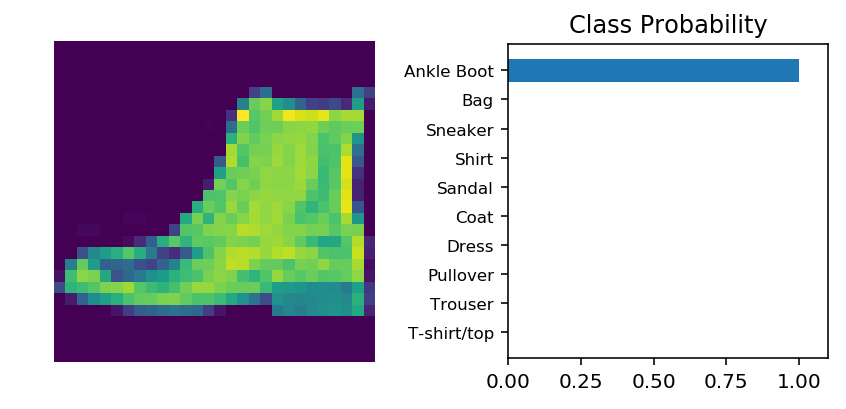

In [40]:
# Test out your network!

model.eval()

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]
# Convert 2D image to 1D vector
img = img.view(1, 784)

# Calculate the class probabilities (softmax) for img
with torch.no_grad():
    output = model.forward(img)

ps = torch.exp(output)

# Plot the image and probabilities
helper.view_classify(img.view(1, 28, 28), ps, version='Fashion')

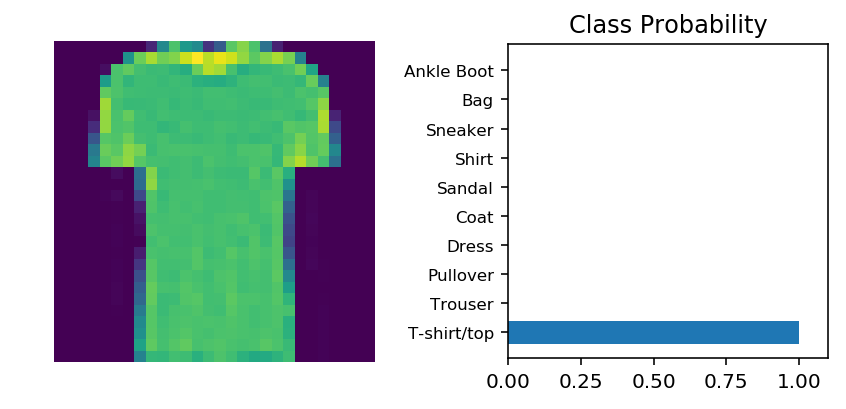

In [41]:
# Test out your network!

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]
# Convert 2D image to 1D vector
img = img.resize_(1, 784)

with torch.no_grad():
    logits = model.forward(img)
    
# TODO: Calculate the class probabilities (softmax) for img
ps = F.softmax(logits, dim=1)

# Plot the image and probabilities
helper.view_classify(img.resize_(1, 28, 28), ps, version='Fashion')

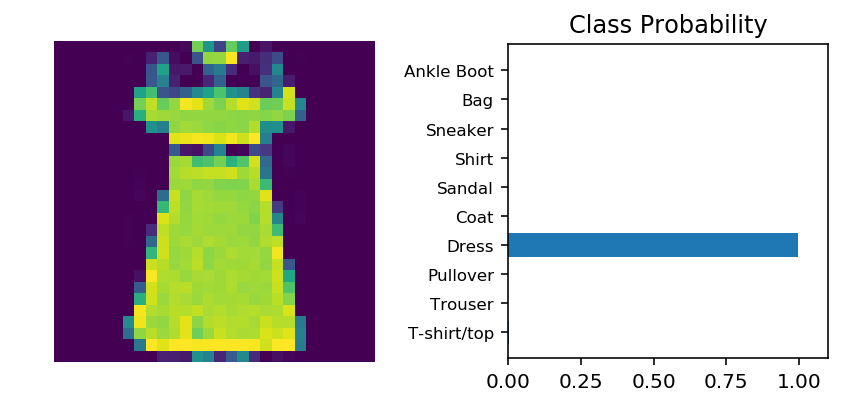

In [46]:
# Test out your network!

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]
# Convert 2D image to 1D vector
img = img.resize_(1, 784)

logits = model.forward(img)
    
# TODO: Calculate the class probabilities (softmax) for img
ps = F.softmax(logits, dim=1)

# Plot the image and probabilities
helper.view_classify(img.resize_(1, 28, 28), ps, version='Fashion')

Now that your network is trained, you'll want to save it to disk so you can load it later instead of training it again. Obviously, it's impractical to train a network every time you need one. In practice, you'll train it once, save the model, then reload it for further training or making predictions. In the next part, I'll show you how to save and load trained models.